In [121]:
#import libraries here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import re
from PIL import Image
from IPython.display import Image as im
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline

In [2]:
#read data to DataFrame
wine_main = pd.read_csv('winemag-data-130k-v2.csv')

#shape
print(wine_main.shape)

wine_main.head()


(129971, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


region_2                 61.14
designation              28.83
taster_twitter_handle    24.02
taster_name              20.19
region_1                 16.35
price                     6.92
province                  0.05
country                   0.05
variety                   0.00
winery                    0.00
title                     0.00
points                    0.00
description               0.00
Unnamed: 0                0.00
dtype: float64

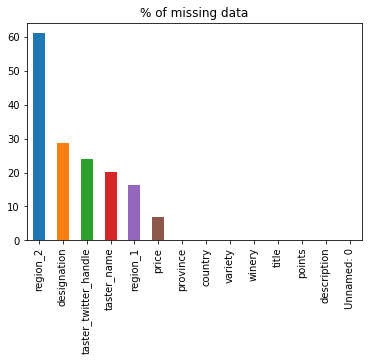

In [3]:
#identify missing data by column
missing_by_columns = wine_main.isnull().mean().sort_values(ascending=False).round(4)*100
missing_by_columns.plot(kind='bar')
plt.title("% of missing data")
missing_by_columns

Among the columns with the most missing values are region_2 (%61), designation (%29), taster_twitter_handle (%24) and taster_name (%20). I decided to drop this column. The missing values in region_1 can simply mean that there is no region which can give important information.

In [4]:
#drop region_2, designation, taster_twitter_handle, taster_name
wine_clmn_reduced = wine_main.drop(columns=["region_2", "designation", "taster_twitter_handle", "taster_name"])
wine_clmn_reduced.head()

,Unnamed: 0,country,description,points,price,province,region_1,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
#missing by rows
#drop rows with missing price
wine_row_reduced = wine_clmn_reduced.dropna(subset=['price'], how='any')
print(wine_row_reduced.shape)
wine_row_reduced.head()

(120975, 10)


,Unnamed: 0,country,description,points,price,province,region_1,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [6]:
#check missing values by column again
wine_row_reduced.isnull().sum().sort_values(ascending=False)

region_1       19575
province          59
country           59
variety            1
winery             0
title              0
price              0
points             0
description        0
Unnamed: 0         0
dtype: int64

In [7]:
#Since country is one of the most important attribute to predict price. We will drop 59 rows with missing country. 
wine_row_reduced = wine_row_reduced.dropna(subset=['country','variety'], how='any')
#check missing values by column again
print("Number of rows, columns:", (wine_row_reduced.shape[0], wine_row_reduced.shape[1]))
wine_row_reduced.isnull().sum().sort_values(ascending=False)


Number of rows, columns: (120915, 10)


region_1       19515
winery             0
variety            0
title              0
province           0
price              0
points             0
description        0
country            0
Unnamed: 0         0
dtype: int64

In [8]:
#identify categorical attributes
wine_row_reduced.dtypes

Unnamed: 0       int64
country         object
description     object
points           int64
price          float64
province        object
region_1        object
title           object
variety         object
winery          object
dtype: object

There are 8 object type attributes, we can one hot encode country, province, region_1, title, variety and winery

Let's use the simple example to study how to join the reviews with similar titles and take a mean for its numerical values

In [9]:
df = pd.DataFrame({'index':[1,2,3], 'title': ['w1', 'w1', 'w2'], 'price': [3, 4, 4], 'country': ['US','US','UK'], 'review': ['good', 'flavor', 'berry']})
df


,index,title,price,country,review
0,1,w1,3,US,good
1,2,w1,4,US,flavor
2,3,w2,4,UK,berry


In [10]:
df2 = df.groupby('title').agg(dict(price = 'mean', country = 'first', review = list) ).reset_index()
df2

,title,price,country,review
0,w1,3.5,US,"[good, flavor]"
1,w2,4.0,UK,[berry]


Now, let's apply the similar operations to our wine database. I will group by wine by title, take mean value for the price and points, take the first entry for country, province, region_1, variety and winery (because all this attributes supposed to be the same for given title), and I will joint descriptions together making a list of available reviews for given wine.

In [11]:
#Lets group by wines by title
wine_groupped = wine_row_reduced.groupby('title').agg(dict(country = 'first', description = list, points = 'mean', price = 'mean', province='first', region_1 = 'first', variety = 'first', winery = 'first')).reset_index()
wine_groupped

,title,country,description,points,price,province,region_1,variety,winery
0,1+1=3 2008 Rosé Cabernet Sauvignon (Penedès),Spain,[The previous two years we did not find this w...,82.0,18.0,Catalonia,Penedès,Cabernet Sauvignon,1+1=3
1,1+1=3 NV Brut Sparkling (Cava),Spain,[Spiced apple and toast aromas are clean and d...,87.0,16.0,Catalonia,Cava,Sparkling Blend,1+1=3
2,1+1=3 NV Cygnus Brut Nature Reserva Made With ...,Spain,"[Clean, fresh apple aromas and a minerally, ci...",89.0,20.0,Catalonia,Cava,Sparkling Blend,1+1=3
3,1+1=3 NV Rosé Sparkling (Cava),Spain,"[A dusty, yeasty nose is simplistic but friend...",86.0,20.0,Catalonia,Cava,Sparkling Blend,1+1=3
4,10 Knots 2006 Beachcomber White (Paso Robles),US,"[A Rhône blend of Viognier, Roussanne and Mars...",83.0,21.0,California,Paso Robles,Rhône-style White Blend,10 Knots
5,10 Knots 2006 Chardonnay (Santa Barbara County),US,[Oaky influences give this wine a candied tast...,85.0,21.0,California,Santa Barbara County,Chardonnay,10 Knots
6,10 Knots 2009 Moonraker Grenache (Paso Robles),US,"[Hot in alcohol, simple in everything else, th...",81.0,35.0,California,Paso Robles,Grenache,10 Knots
7,10 Knots 2010 Viognier (Paso Robles),US,"[A strongly flavored, sugary, unsubtle wine, l...",84.0,22.0,California,Paso Robles,Viognier,10 Knots
8,100 Percent Wine 2012 All Profits to Charity R...,US,"[Juicy and fresh, this deeply colored wine off...",89.0,18.0,California,California,Red Blend,100 Percent Wine
9,100 Percent Wine 2014 All Profits to Charity S...,US,"[Herbaceous in aroma, dry and lean on the pala...",84.0,18.0,California,California,Sauvignon Blanc,100 Percent Wine


Fist question that I am interested in:

**1. What countries are the major producers of the wine and what sorts of wine have the best rating in those countries?**

In [12]:
countries_wine_counts = wine_groupped['country'].value_counts(ascending=False)
countries_wine_counts

US                        50012
France                    15817
Italy                     15407
Spain                      5954
Portugal                   4475
Chile                      4123
Argentina                  3500
Austria                    2527
Australia                  2155
Germany                    1949
New Zealand                1238
South Africa               1195
Israel                      453
Greece                      424
Canada                      224
Bulgaria                    132
Hungary                     128
Romania                     101
Uruguay                      98
Turkey                       80
Georgia                      74
Slovenia                     70
Mexico                       68
Croatia                      68
England                      59
Moldova                      56
Brazil                       44
Lebanon                      32
Morocco                      24
Peru                         16
Ukraine                      14
Macedoni

We will create barplot of major wine producers that produce more than 1000 different wines

Index(['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina',
       'Austria', 'Australia', 'Germany', 'New Zealand', 'South Africa'],
      dtype='object')


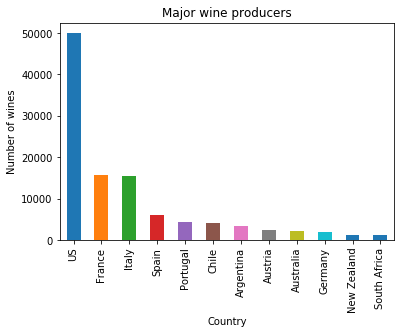

In [13]:
countries_wine_counts[:12].plot(kind='bar')
plt.title("Major wine producers")
plt.ylabel("Number of wines")
plt.xlabel("Country")
major_countries = countries_wine_counts[:12].index
print(major_countries)

In [14]:
wine_groupped['counts'] = 0
country_variety_counts =  wine_groupped.groupby(['country', 'variety']).agg(dict(counts = 'count', points = 'median')).sort_values(by='counts', ascending=False).reset_index()
country_variety_counts[:10]

,country,variety,counts,points
0,US,Pinot Noir,9121,90.0
1,US,Cabernet Sauvignon,6780,89.0
2,US,Chardonnay,6235,88.0
3,US,Syrah,2998,90.0
4,Italy,Red Blend,2996,89.0
5,France,Bordeaux-style Red Blend,2895,88.0
6,US,Red Blend,2716,88.0
7,US,Zinfandel,2515,88.0
8,US,Merlot,2133,87.0
9,Italy,Nebbiolo,2093,90.0


First, I will analyze US wines and then apply similar analysis to  other first 12 popular countries.
I will choose 10 most popular sorts (variety) and obtain mean points for it.

In [15]:
us = country_variety_counts.loc[country_variety_counts['country']=='US'][:10]
variety_list = us['variety'].values
variety_list

array(['Pinot Noir', 'Cabernet Sauvignon', 'Chardonnay', 'Syrah',
       'Red Blend', 'Zinfandel', 'Merlot', 'Sauvignon Blanc',
       'Bordeaux-style Red Blend', 'Riesling'], dtype=object)

In [16]:
wine_groupped[wine_groupped['variety'].isin(variety_list)][wine_groupped['country']=='US']

/Users/maxim/miniconda/envs/Python_36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,title,country,description,points,price,province,region_1,variety,winery,counts
5,10 Knots 2006 Chardonnay (Santa Barbara County),US,[Oaky influences give this wine a candied tast...,85.0,21.0,California,Santa Barbara County,Chardonnay,10 Knots,0
8,100 Percent Wine 2012 All Profits to Charity R...,US,"[Juicy and fresh, this deeply colored wine off...",89.0,18.0,California,California,Red Blend,100 Percent Wine,0
9,100 Percent Wine 2014 All Profits to Charity S...,US,"[Herbaceous in aroma, dry and lean on the pala...",84.0,18.0,California,California,Sauvignon Blanc,100 Percent Wine,0
11,1000 Stories 2013 Bourbon Barrel Aged Zinfande...,US,[This approachable wine from the Fetzer organi...,91.0,19.0,California,Mendocino,Zinfandel,1000 Stories,0
12,1000 Stories 2014 Bourbon Barrel Aged Batch No...,US,[Exotically fruity with an enticing floral cha...,90.0,19.0,California,California,Zinfandel,1000 Stories,0
13,1070 Green 2011 Sauvignon Blanc (Rutherford),US,"[Flavors of green hay, tart juniper berry and ...",88.0,25.0,California,Rutherford,Sauvignon Blanc,1070 Green,0
14,10Span 2011 Pinot Noir (Santa Barbara County),US,[Some overripe and green notes dilute the cher...,83.0,15.0,California,Santa Barbara County,Pinot Noir,10Span,0
15,10Span 2012 Chardonnay (Santa Barbara County),US,"[Pretty standard Chardonnay, with a creamy tex...",83.0,13.0,California,Santa Barbara County,Chardonnay,10Span,0
17,10Span 2013 Pinot Noir (Central Coast),US,[Very perfumed aromas of violets and Hawaiian ...,83.0,7.0,California,Central Coast,Pinot Noir,10Span,0
26,12C Wines 2012 Beckstoffer Vineyard Georges I...,US,[A 100% varietal wine from a prime Beckstoffer...,90.0,75.0,California,Rutherford,Cabernet Sauvignon,12C Wines,0


/Users/maxim/miniconda/envs/Python_36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


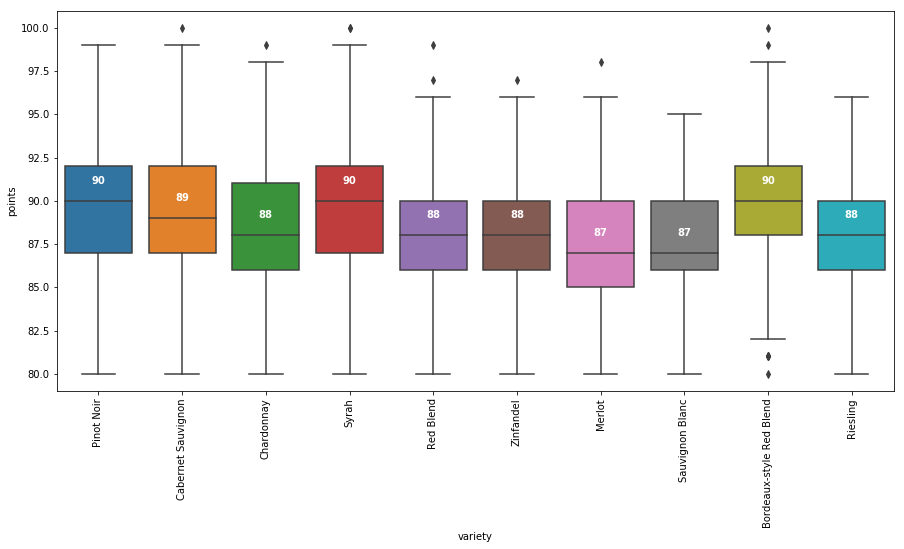

In [17]:
df = wine_groupped[wine_groupped['variety'].isin(variety_list)][wine_groupped['country']=='US']

fig, ax = plt.subplots(figsize = (15,7))
chart = sns.boxplot(x='variety',y='points', data=df, ax = ax, order=variety_list)

medians = us['points'].values
median_labels = [str(int(s)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 1.0, median_labels[tick], 
            horizontalalignment='center', size='medium', color='w', weight='semibold')
plt.xticks(rotation = 90)
plt.show()

In [18]:
#Create function that will determine 10 top wine varieties for a given country 
#and plot boxplot diagram of median points for these 10 varieties

def top_ten_varieties(df, country):    
    country_data = df.loc[country_variety_counts['country']==country][:10]
    return country_data['variety'].values

def create_points_boxplot(df, country, n_varieties=10):
    country_data = country_variety_counts.loc[country_variety_counts['country']==country][:n_varieties]
    variety_list = country_data['variety'].values
    df = df[df['variety'].isin(variety_list)][df['country']==country]

    fig, ax = plt.subplots(figsize = (5,4))
    chart = sns.boxplot(x='variety',y='points', data=df, ax = ax, order=variety_list)

    medians = country_data['points'].values
    median_labels = [str(int(s)) for s in medians]

    pos = range(len(medians))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.3, median_labels[tick], 
                horizontalalignment='center', size='small', color='lightgrey', weight='semibold')
    plt.xticks(rotation = 90)
    plt.title(country)
    plt.show()  

    


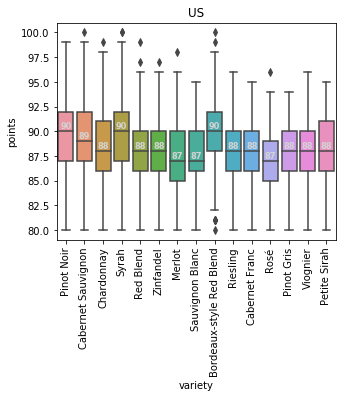

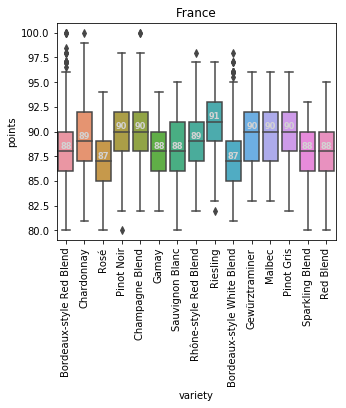

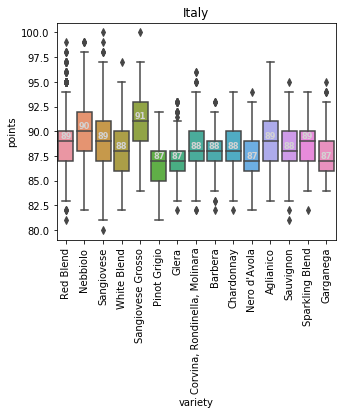

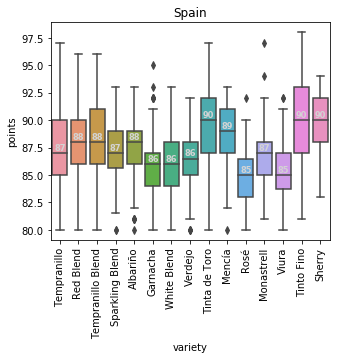

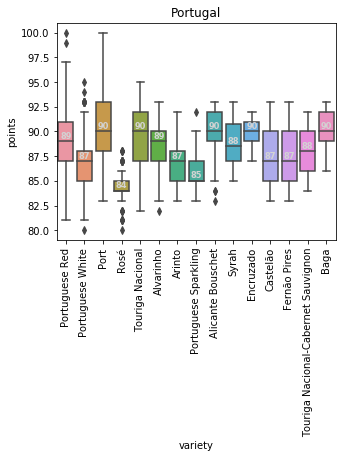

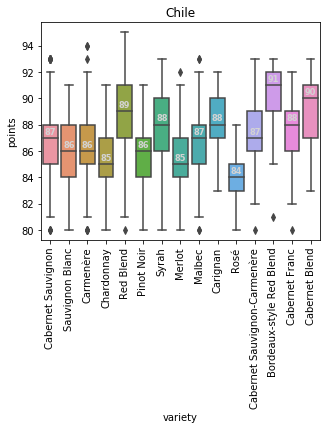

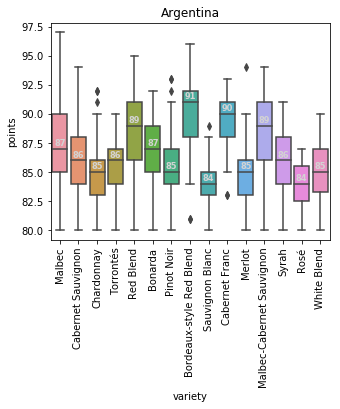

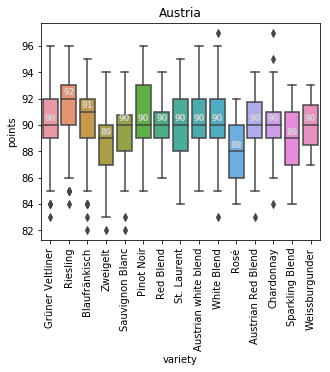

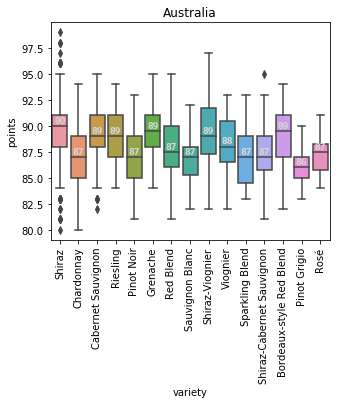

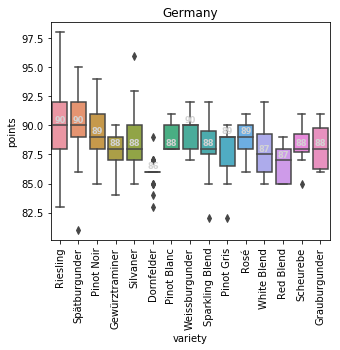

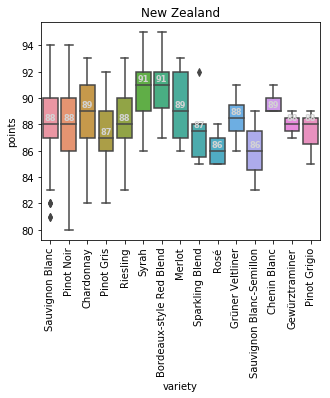

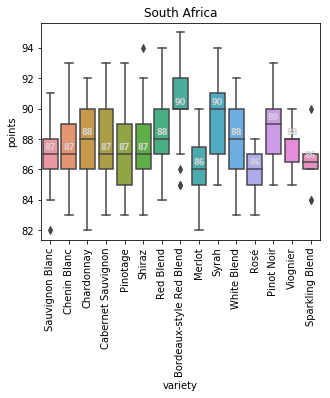

In [19]:
import warnings
warnings.filterwarnings('ignore')
for country in major_countries:
    create_points_boxplot(wine_groupped, country, 15)
     
    

**2. What are the best rated wines in the different price category??**

Four categories will be considered:
    - $0-$15
    - $15-$50
    - $50-$150
    - >$150

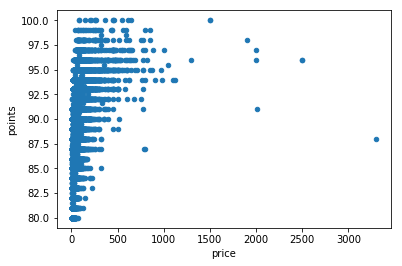

In [20]:
wine_groupped.plot(kind='scatter', x = 'price', y= 'points')

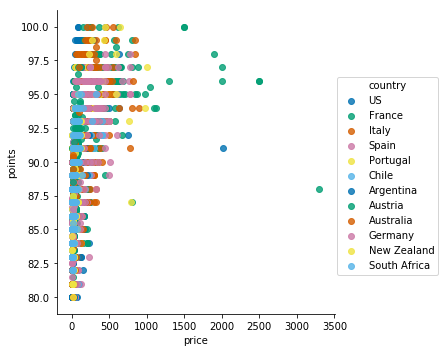

In [21]:
df = wine_groupped[wine_groupped['country'].isin(major_countries)]
sns.lmplot(x = 'price', y= 'points', hue_order = major_countries, fit_reg=False, palette = sns.color_palette("colorblind"), data = df, hue="country", )

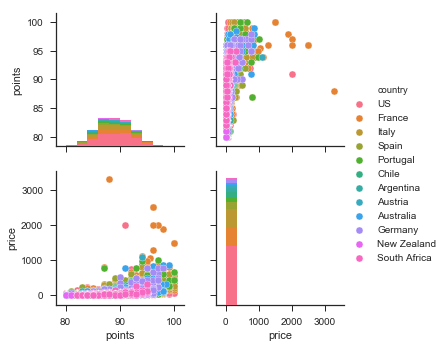

In [22]:
#df = wine_groupped[wine_groupped['country'].isin(major_countries)]
df = df.drop(["counts"], axis=1)
sns.set(style="ticks")
sns.pairplot(df, hue_order = major_countries, hue="country" )

    - $0-$15

In [23]:
df1 = wine_groupped[wine_groupped['price']<15].sort_values(['points', 'price'], ascending=[False, True])
df1[['title','variety','country', 'province','points','price'] ][:15]


,title,variety,country,province,points,price
82418,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red,Portugal,Douro,94.0,13.0
75027,Osborne NV Pedro Ximenez 1827 Sweet Sherry She...,Sherry,Spain,Andalucia,94.0,14.0
24111,Château d'Aydie 2010 Aydie l'Origine Tannat-Ca...,Tannat-Cabernet Franc,France,Southwest France,93.0,12.0
5711,Aveleda 2012 Follies Casa da Agueira Touriga N...,Touriga Nacional,Portugal,Bairrada,93.0,13.0
24026,Château Vincens 2011 Prestige Malbec-Merlot (C...,Malbec-Merlot,France,Southwest France,93.0,13.0
2198,Allram 2013 Hasel Alte Reben Reserve Grüner Ve...,Grüner Veltliner,Austria,Kamptal,93.0,14.0
48384,Gunter Triebaumer 2015 Furmint (Burgenland),Furmint,Austria,Burgenland,93.0,14.0
73885,Novy 2006 Oley Dessert Wine Viognier (Russian ...,Viognier,US,California,93.0,14.0
102044,Uvaggio 2009 Vermentino (Lodi),Vermentino,US,California,93.0,14.0
5706,Aveleda 2011 Follies Fonte Nossa Senhora da Va...,Touriga Nacional-Cabernet Sauvignon,Portugal,Bairrada,92.0,11.0


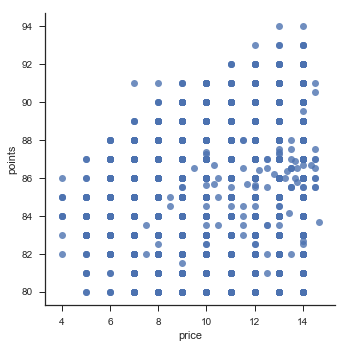

In [24]:
sns.lmplot(x = 'price', y= 'points', fit_reg=False, data = df1)

    - $15-$50

In [25]:
df2 = wine_groupped[wine_groupped['price']>=15][wine_groupped['price']<50].sort_values(['points', 'price'], ascending=[False, True])
df2[['title','variety','country', 'province','points','price'] ][:15]

,title,variety,country,province,points,price
40245,Failla 2010 Estate Vineyard Chardonnay (Sonoma...,Chardonnay,US,California,99.0,44.0
36038,Donkey & Goat 2010 Fenaughty Vineyard Syrah (E...,Syrah,US,California,97.0,35.0
96437,Taylor Fladgate NV 325 Anniversary (Port),Port,Portugal,Port,97.0,40.0
21482,Château Coutet 2014 Barsac,Bordeaux-style White Blend,France,Bordeaux,97.0,45.0
86770,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah,US,Washington,96.0,20.0
36046,Donkey & Goat 2012 Grenache Noir Grenache (El ...,Grenache,US,California,96.0,27.0
52681,Isole e Olena 2010 Chianti Classico,Red Blend,Italy,Tuscany,96.0,27.0
98569,The Eyrie Vineyards 2014 Estate Chardonnay (Du...,Chardonnay,US,Oregon,96.0,27.0
21645,Château Filhot 2014 Sauternes,Bordeaux-style White Blend,France,Bordeaux,96.0,28.0
38362,Eichinger 2014 Gaisberg Reserve Riesling (Kamp...,Riesling,Austria,Kamptal,96.0,28.0


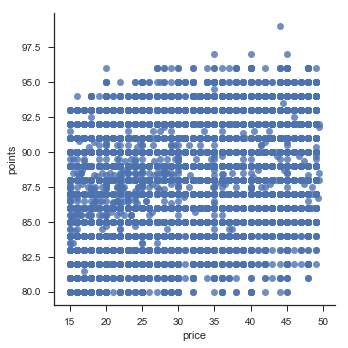

In [26]:
sns.lmplot(x = 'price', y= 'points', fit_reg=False, data = df2)

    - $50-$150

In [27]:
df3 = wine_groupped[wine_groupped['price']>=50][wine_groupped['price']<150].sort_values(['points', 'price'], ascending=[False, True])
df3[['title','variety','country', 'province','points','price'] ][:15]

,title,variety,country,province,points,price
18815,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,US,Washington,100.0,80.0
19861,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,US,Washington,100.0,80.0
18828,Cayuse 2009 En Chamberlin Vineyard Syrah (Wall...,Syrah,US,Oregon,99.0,75.0
18847,Cayuse 2011 En Chamberlin Vineyard Syrah (Wall...,Syrah,US,Oregon,99.0,75.0
108015,Williams Selyem 2010 Hirsch Vineyard Pinot Noi...,Pinot Noir,US,California,99.0,75.0
107998,Williams Selyem 2009 Precious Mountain Vineyar...,Pinot Noir,US,California,99.0,94.0
100491,Trefethen 2005 Reserve Cabernet Sauvignon (Oak...,Cabernet Sauvignon,US,California,99.0,100.0
81421,Quilceda Creek 2008 Cabernet Sauvignon (Columb...,Cabernet Sauvignon,US,Washington,99.0,125.0
103027,Venge 2008 Family Reserve Cabernet Sauvignon (...,Cabernet Sauvignon,US,California,99.0,125.0
79100,Pirouette 2008 Red Wine Red (Columbia Valley (...,Bordeaux-style Red Blend,US,Washington,98.0,50.0


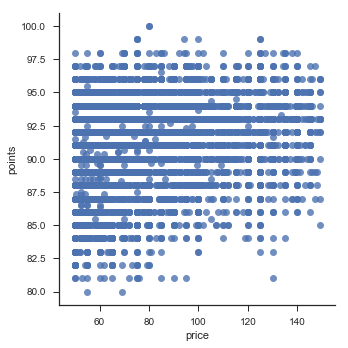

In [28]:
sns.lmplot(x = 'price', y= 'points', fit_reg=False, data = df3)

    - >$150

In [29]:
df4 = wine_groupped[wine_groupped['price']>=150].sort_values(['points', 'price'], ascending=[False, True])
df4[['title','variety','country', 'province','points','price'] ][:15]

,title,variety,country,province,points,price
22743,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,France,Bordeaux,100.0,150.0
15851,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,US,California,100.0,200.0
5802,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Italy,Tuscany,100.0,210.0
63669,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,France,Champagne,100.0,250.0
57763,Krug 2002 Brut (Champagne),Champagne Blend,France,Champagne,100.0,259.0
17003,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso,Italy,Tuscany,100.0,270.0
22750,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend,France,Bordeaux,100.0,359.0
16479,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Portugal,Douro,100.0,450.0
103334,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,US,California,100.0,450.0
97188,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Italy,Tuscany,100.0,460.0


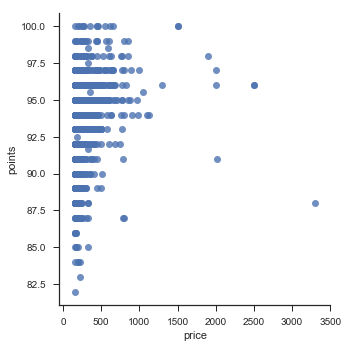

In [30]:
sns.lmplot(x = 'price', y= 'points', fit_reg=False, data = df4)

**3. What is the most common description for the best rated wines produced in different countries?**

In [78]:
def obtain_coutry_description(country):    
    """obtain description list for best rated wines (>87 points)"""
    
    mean_points_value = wine_groupped['points'].mean()
    remove_characters = re.compile('[^A-Za-z ]+')
    
    description_list = list(wine_groupped[wine_groupped['country']==country][wine_groupped['points']>mean_points_value]['description'])
    flat_list = [re.sub(remove_characters, ' ', item) for sublist in description_list for item in sublist]
    description = ' '.join(flat_list)
    return description


In [90]:
def plot_country_wordcloud(words, country_mask, out_image_name):
    """creates word cloud image"""
    stopwords = ['now','nose','aroma', 'aromas', 'selection', 'drink','wine','wines','come','add','give', 'come',
                 'flavor','flavors','note','notes','palate','finish','hint','hints','show','shows']
    for w in stopwords:
        STOPWORDS.add(w)
        
    maska = np.array(Image.open(country_mask))
    wc = WordCloud(background_color="white", mask=maska, max_words=2000, random_state=42, stopwords=STOPWORDS, colormap = 'hsv')
    wc.generate(words)
    wc.to_file(out_image_name)
    
    return wc


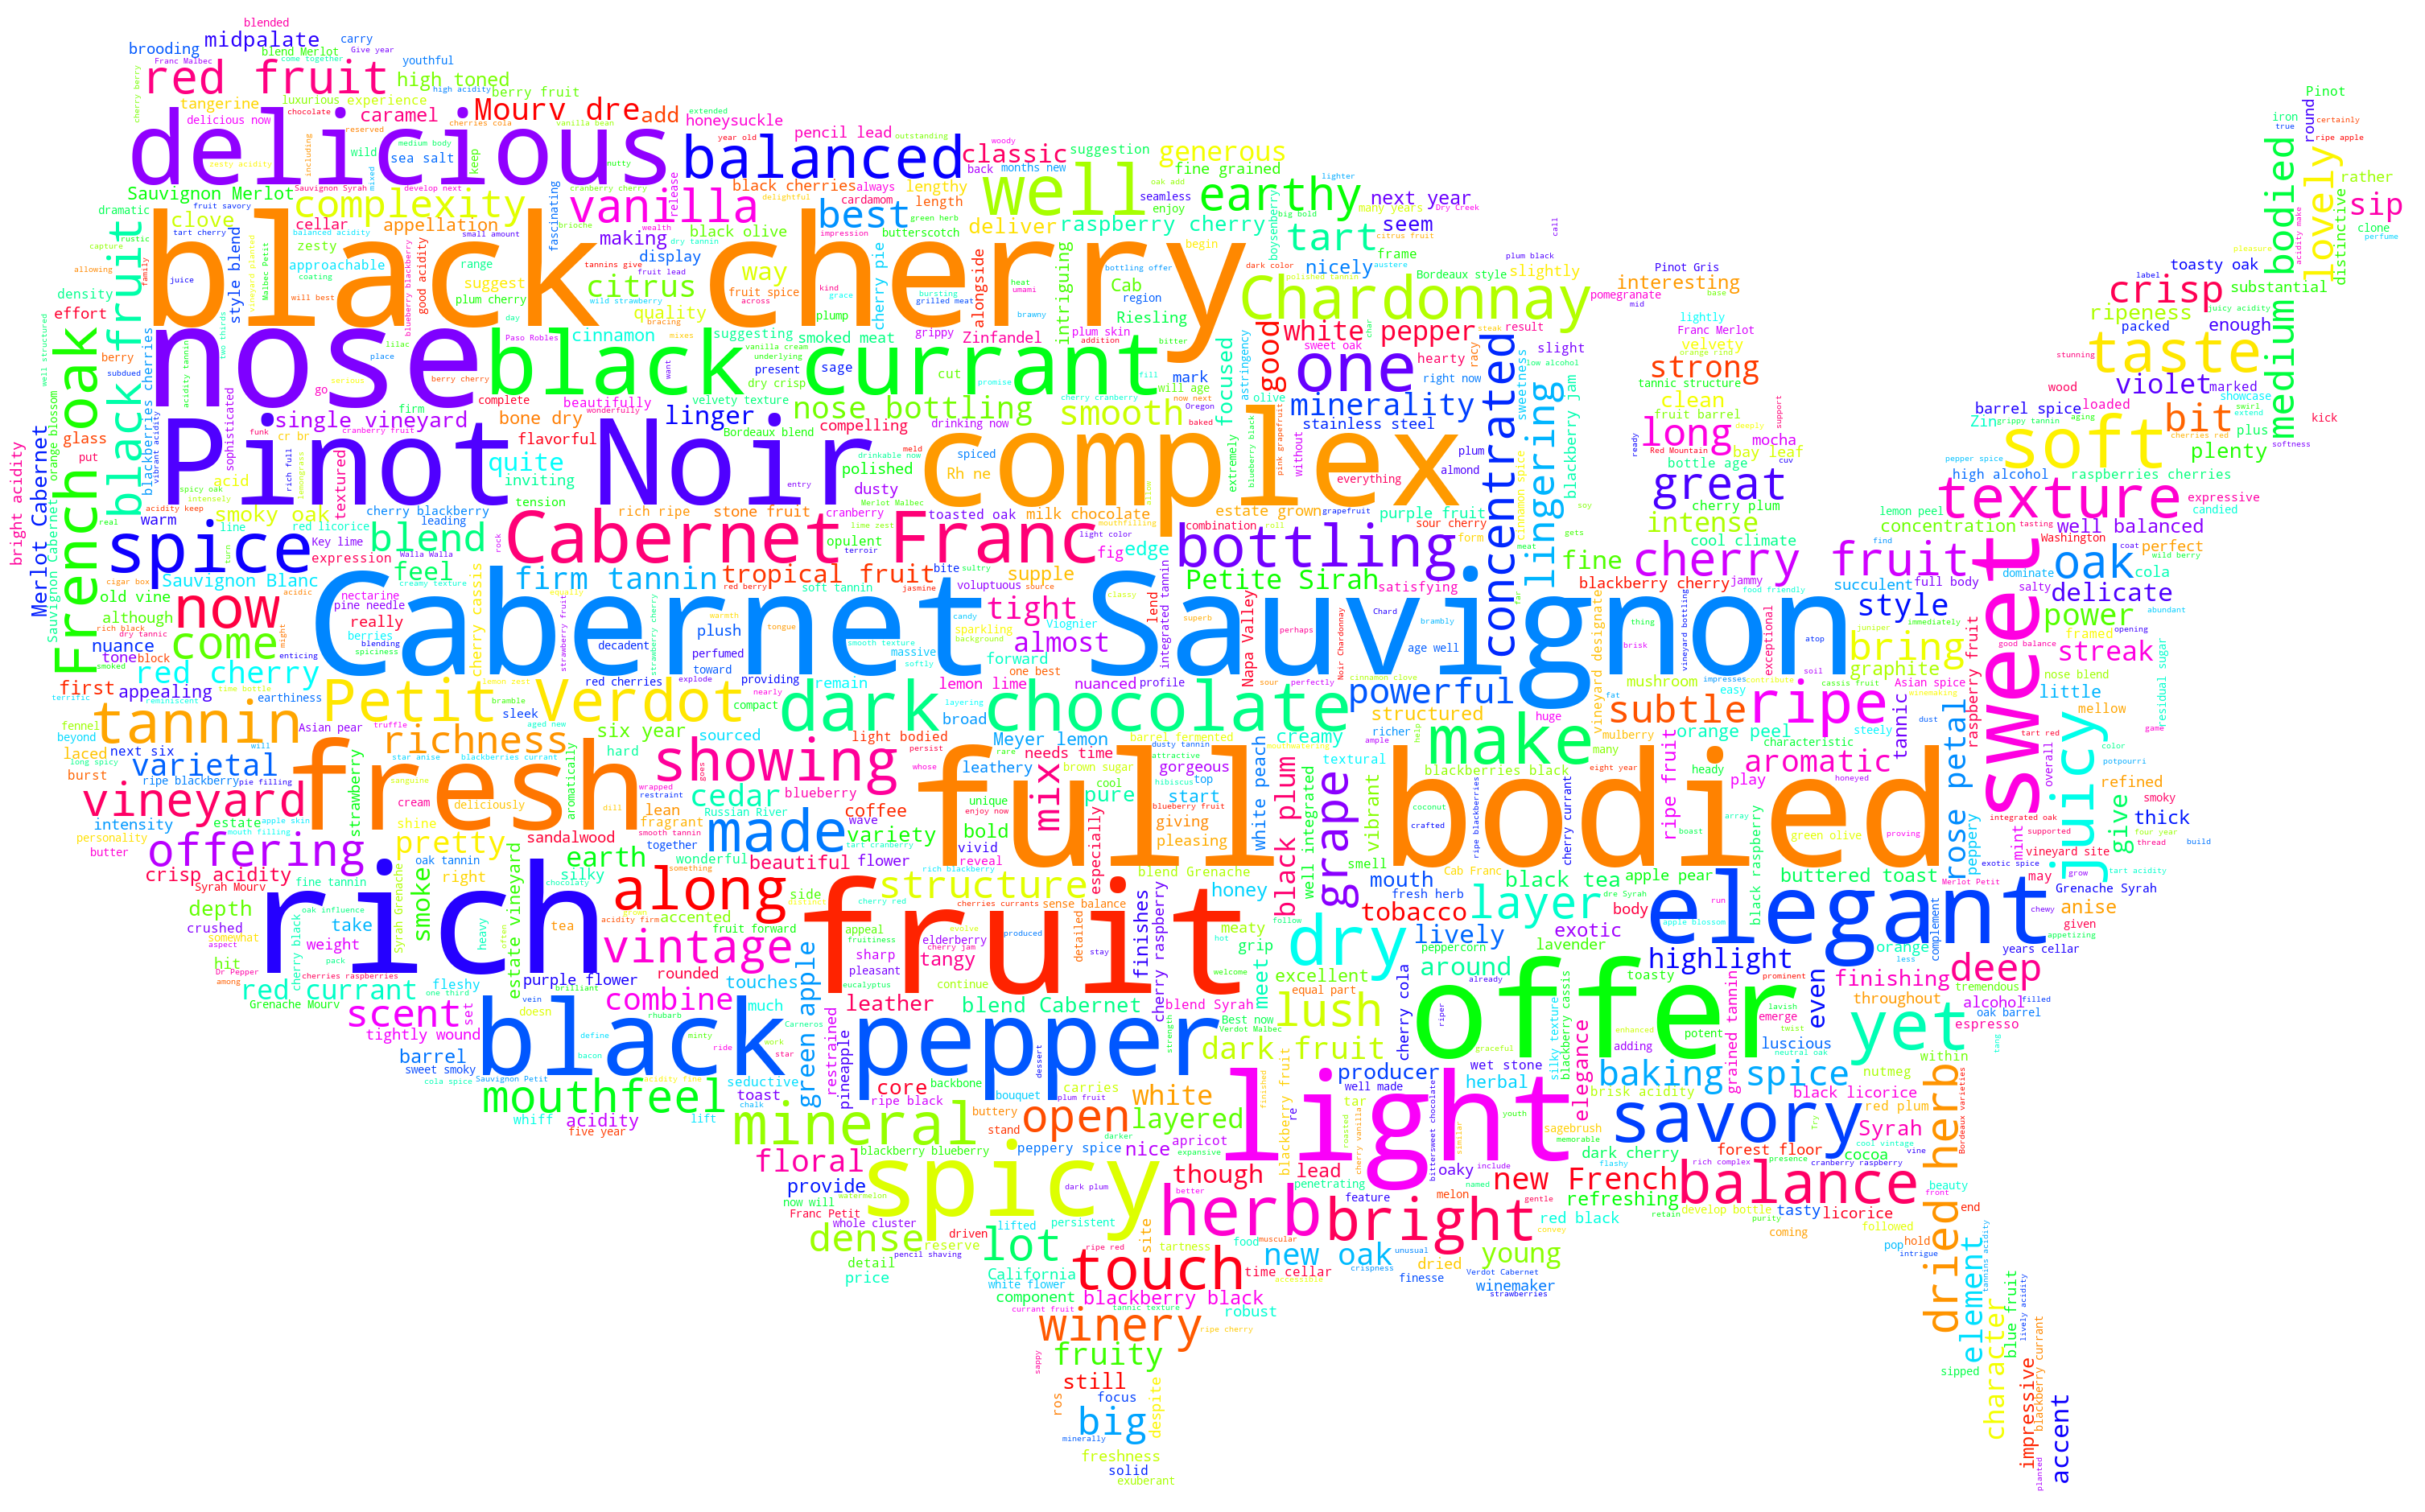

In [81]:
#try it on US
US_mask = './Masks/united-states-silhouette.jpg'
us_description = obtain_coutry_description("US")
us_wc = plot_country_wordcloud(us_description, US_mask, 'US.pdf')
us_wc.to_image()



In [82]:
#create dictionary of mask images
mask_images = {}
mask_images["US"] = './Masks/united-states-silhouette.jpg'
mask_images["France"] = './Masks/france-silhouette.jpg'
mask_images["Italy"] = './Masks/italy-silhouette.jpg'
mask_images["Spain"] = './Masks/spain-silhouette.jpg'
mask_images["South Africa"] = './Masks/south-africa-silhouette.jpg'
mask_images["New Zealand"] = './Masks/new-zealand-silhouette.jpg'
mask_images["Germany"] = './Masks/germany-silhouette.jpg'
mask_images["Argentina"] = './Masks/argentina-silhouette.jpg'
mask_images["Australia"] = './Masks/australia-silhouette.jpg'
mask_images["Austria"] = './Masks/austria-silhouette.jpg'
mask_images["Chile"] = './Masks/chile-silhouette.jpg'
mask_images["Portugal"] = './Masks/portugal-silhouette.jpg'

In [89]:
for country in major_countries:
    print(country)
    description = obtain_coutry_description(country)
    image_name = '_'.join(country.split()) + '.pdf'
    print(image_name)
    wc = plot_country_wordcloud(description, mask_images[country], image_name )
    wc.to_image()
    

US
US.pdf
France
France.pdf
Italy
Italy.pdf
Spain
Spain.pdf
Portugal
Portugal.pdf
Chile
Chile.pdf
Argentina
Argentina.pdf
Austria
Austria.pdf
Australia
Australia.pdf
Germany
Germany.pdf
New Zealand
New_Zealand.pdf
South Africa
South_Africa.pdf


**Feature engineering**

In [95]:
years1 = wine_groupped['title'].str.extract('([1][9][0-9][0-9])').astype('float64')
#print(years1)
years1.fillna(0, inplace=True)
years2 = wine_groupped['title'].str.extract('([2][0][0-1][0-9])').astype('float64')
#print(years2)
years2.fillna(0, inplace=True)
years = np.add(years1,years2)
#print(years)
wine_groupped = wine_groupped.assign(year = years)


In [96]:
def add_feature_from_title(df, feature):
    """
    This function search for listed word in title and add it as a separate feauture (column)
    
    Args:
    df (DataFrame): dataframe with column title
    feature (str): word that wull be searched in title
    
    Returns:
    
    df
    """
    feature_occurrence = df['title'].str.lower().str.find(feature)
    feature_occurrence[feature_occurrence >= 0] = 1
    feature_occurrence[feature_occurrence == -1] = 0

    df[feature] = feature_occurrence
    
    return df

wine_groupped = add_feature_from_title(wine_groupped, "sparkling")
wine_groupped = add_feature_from_title(wine_groupped, "vintage")

In [97]:
#check if there is vintage wine with no year assigned
wine_groupped[wine_groupped["year"]==0][wine_groupped['vintage']==1]

,title,country,description,points,price,province,region_1,variety,winery,counts,year,sparkling,vintage
100008,Torre Oria NV Brut Nature Vintage Sparkling (C...,Spain,"[Gassy, bready apple aromas are dull and unfoc...",82.0,13.0,Catalonia,Cava,Sparkling Blend,Torre Oria,0,0.0,1,1


In [98]:
#Calculate mean of year for sparkling vintage wines
mean_vintage_sparkling = round(wine_groupped[wine_groupped["vintage"]==1][wine_groupped['sparkling']==1]['year'].mean(),0)
mean_vintage_sparkling

1966.0

In [99]:
#substitute missing year
index = wine_groupped[wine_groupped["year"]==0][wine_groupped['vintage']==1].index[0]
wine_groupped.set_value(index=index, col='year', value=mean_vintage_sparkling)

,title,country,description,points,price,province,region_1,variety,winery,counts,year,sparkling,vintage
0,1+1=3 2008 Rosé Cabernet Sauvignon (Penedès),Spain,[The previous two years we did not find this w...,82.0,18.0,Catalonia,Penedès,Cabernet Sauvignon,1+1=3,0,2008.0,0,0
1,1+1=3 NV Brut Sparkling (Cava),Spain,[Spiced apple and toast aromas are clean and d...,87.0,16.0,Catalonia,Cava,Sparkling Blend,1+1=3,0,0.0,1,0
2,1+1=3 NV Cygnus Brut Nature Reserva Made With ...,Spain,"[Clean, fresh apple aromas and a minerally, ci...",89.0,20.0,Catalonia,Cava,Sparkling Blend,1+1=3,0,0.0,1,0
3,1+1=3 NV Rosé Sparkling (Cava),Spain,"[A dusty, yeasty nose is simplistic but friend...",86.0,20.0,Catalonia,Cava,Sparkling Blend,1+1=3,0,0.0,1,0
4,10 Knots 2006 Beachcomber White (Paso Robles),US,"[A Rhône blend of Viognier, Roussanne and Mars...",83.0,21.0,California,Paso Robles,Rhône-style White Blend,10 Knots,0,2006.0,0,0
5,10 Knots 2006 Chardonnay (Santa Barbara County),US,[Oaky influences give this wine a candied tast...,85.0,21.0,California,Santa Barbara County,Chardonnay,10 Knots,0,2006.0,0,0
6,10 Knots 2009 Moonraker Grenache (Paso Robles),US,"[Hot in alcohol, simple in everything else, th...",81.0,35.0,California,Paso Robles,Grenache,10 Knots,0,2009.0,0,0
7,10 Knots 2010 Viognier (Paso Robles),US,"[A strongly flavored, sugary, unsubtle wine, l...",84.0,22.0,California,Paso Robles,Viognier,10 Knots,0,2010.0,0,0
8,100 Percent Wine 2012 All Profits to Charity R...,US,"[Juicy and fresh, this deeply colored wine off...",89.0,18.0,California,California,Red Blend,100 Percent Wine,0,2012.0,0,0
9,100 Percent Wine 2014 All Profits to Charity S...,US,"[Herbaceous in aroma, dry and lean on the pala...",84.0,18.0,California,California,Sauvignon Blanc,100 Percent Wine,0,2014.0,0,0


In [100]:
#now assign the latest year for all 0 year values
wine_groupped['year'].replace(0, 2017, inplace=True)
wine_groupped[:5]

,title,country,description,points,price,province,region_1,variety,winery,counts,year,sparkling,vintage
0,1+1=3 2008 Rosé Cabernet Sauvignon (Penedès),Spain,[The previous two years we did not find this w...,82.0,18.0,Catalonia,Penedès,Cabernet Sauvignon,1+1=3,0,2008.0,0,0
1,1+1=3 NV Brut Sparkling (Cava),Spain,[Spiced apple and toast aromas are clean and d...,87.0,16.0,Catalonia,Cava,Sparkling Blend,1+1=3,0,2017.0,1,0
2,1+1=3 NV Cygnus Brut Nature Reserva Made With ...,Spain,"[Clean, fresh apple aromas and a minerally, ci...",89.0,20.0,Catalonia,Cava,Sparkling Blend,1+1=3,0,2017.0,1,0
3,1+1=3 NV Rosé Sparkling (Cava),Spain,"[A dusty, yeasty nose is simplistic but friend...",86.0,20.0,Catalonia,Cava,Sparkling Blend,1+1=3,0,2017.0,1,0
4,10 Knots 2006 Beachcomber White (Paso Robles),US,"[A Rhône blend of Viognier, Roussanne and Mars...",83.0,21.0,California,Paso Robles,Rhône-style White Blend,10 Knots,0,2006.0,0,0


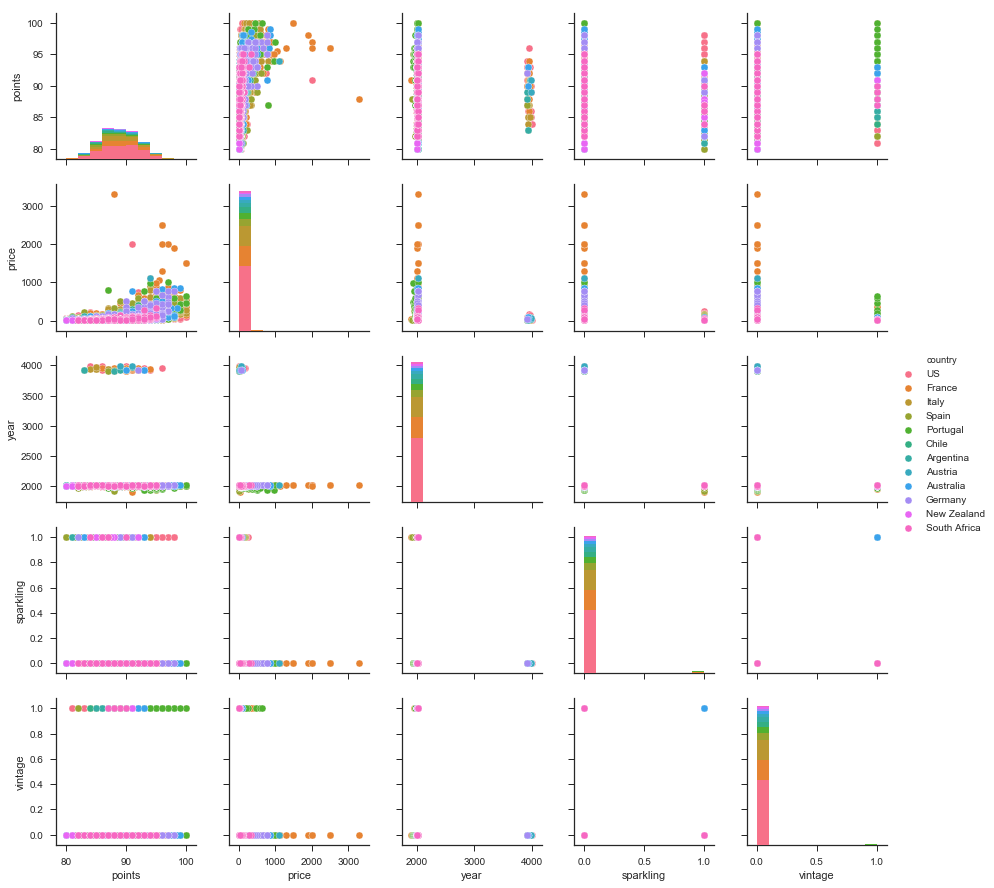

In [101]:
df = wine_groupped[wine_groupped['country'].isin(major_countries)]
df = df.drop(["counts"], axis=1)
sns.set(style="ticks")
sns.pairplot(df, hue_order = major_countries, hue="country" )

**Re-Encode Categorical Features**

In [115]:
print("Number of countries: ", len(df_no_reviews['country'].value_counts()))
print("Number of provinces: ", len(df_no_reviews['province'].value_counts()))
print("Number of regions: ", len(df_no_reviews['region_1'].value_counts()))
print("Number of varieties: ", len(df_no_reviews['variety'].value_counts()))
print("Number of wineries: ", len(df_no_reviews['winery'].value_counts()))

df_no_reviews = wine_groupped.drop(['title', 'description','counts', 'winery'], axis=1)

#check later, maybe drop regions (1204)

# Re-encode categorical features to be kept in the analysis.
reencode_categ = ['country', 'province', 'region_1', 'variety']
reencoded_wines = pd.get_dummies(df_no_reviews, columns=reencode_categ, drop_first=True)
print(df_no_reviews.shape)
print(reencoded_wines.shape)

Number of countries:  42
Number of provinces:  422
Number of regions:  1204
Number of varieties:  691
Number of wineries:  15843
(110582, 9)
(110582, 2360)


In [116]:
#check whether all columns are of numeric dtype
for column in reencoded_wines.columns:
    if pd.api.types.is_numeric_dtype(reencoded_wines[column])==False:
        print(column)
        print(reencoded_wines[column])
                                



In [119]:
#check missing values
missing = reencoded_wines.isnull().sum(axis=0).sort_values(ascending=False)
print(missing[:10])

variety_Žilavka                                 0
region_1_Coste della Sesia                      0
region_1_Coteaux du Vendômois                   0
region_1_Coteaux du Lyonnais                    0
region_1_Coteaux du Layon Chaume                0
region_1_Coteaux du Layon Beaulieu              0
region_1_Coteaux du Layon                       0
region_1_Coteaux du Languedoc Pic Saint Loup    0
region_1_Coteaux du Languedoc                   0
region_1_Coteaux du Giennois                    0
dtype: int64


In [ ]:
scaler = StandardScaler()
scaler.fit(reencoded_wines[:])
reencoded_wines[:] = scaler.transform(reencoded_wines[:])
print(reencoded_wines.head())

In [ ]:
# Apply PCA to the data.

print("Current number of features: ", reencoded_wines.shape[1])
pca = PCA()
wines_pca = pca.fit_transform(reencoded_wines)
sum(pca.explained_variance_ratio_)




In [ ]:
# Investigate the variance accounted for by each principal component.
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(15, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
  
scree_plot(pca)



In [ ]:
#choose the number of dimensions that add up to 85% of variance.

cumsum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumsum >= 0.85) + 1
print("number of dimensions that add up to 85% of variance:", n_components)



In [ ]:
# Re-apply PCA to the data while selecting for number of components to retain.

pca = PCA(n_components)
wines_pca = reencoded_wines.copy()
pca.fit(wines_pca)
wines_pca = pca.transform(wines_pca)
explained_var_ratio = sum(pca.explained_variance_ratio_)
print("Explained variance ratio:", explained_var_ratio)

print(wines_pca.shape)